In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import matplotlib.cm
import scipy.stats
import pandas
import itertools
from mpl_toolkits import basemap
import mpl_toolkits.axes_grid1
import time

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

# Determine number of "events" that happen per year, and then establish your return period of interest

In [2]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

In [3]:
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/'
#threshold=0.0
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

In [4]:
PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'
window=1

In [5]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

# Open and save preindustrial control data

In [6]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [7]:
monthly_total_values_pic = numpy.load('csv_files/monthly_total_values_pic.npy')

In [8]:
print(monthly_total_values_pic.shape)

(650, 1798, 5)


In [9]:
# pull out coastal cali lat/lon values
monthly_total_values_pic = monthly_total_values_pic.reshape((PRECT_nlat, PRECT_nlon,1798,5))

In [10]:
monthly_pic_cali_coast = monthly_total_values_pic[cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1],:,:].reshape((11,3,1798,5))
monthly_pic_cali_coast_lonmean = numpy.mean(monthly_pic_cali_coast, axis=1)
print(monthly_pic_cali_coast_lonmean.shape)
monthly_pic_cali_coast_timemean = numpy.mean(monthly_pic_cali_coast_lonmean, axis=1)

(11, 1798, 5)


In [11]:
print(monthly_total_values_pic.shape)

(26, 25, 1798, 5)


In [31]:
# calculate standard error of the mean
monthly_pic_stdev = numpy.std(monthly_total_values_pic, axis=2, ddof=1)
monthly_pic_stderr = monthly_pic_stdev#/numpy.sqrt(monthly_total_values_pic.shape[2]) # 26x25x5
monthly_pic_cali_coast_stderr = monthly_pic_stderr[cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1],:].reshape((11,3,-1))
monthly_pic_cali_coast_stderr_lonmean = numpy.mean(monthly_pic_cali_coast_stderr, axis=1)

In [32]:
print(monthly_pic_cali_coast_stderr_lonmean.shape)

(11, 5)


In [33]:
print(monthly_pic_stderr.shape)

(26, 25, 5)


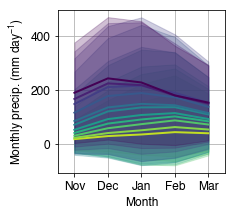

In [38]:
month_values = [1.5,2.5,3.5,4.5,5.5]
month_labels = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']

fontsize=12
fig = mp.figure(figsize=(3,3))
ax = fig.add_subplot(111)
for i in range(11):
    ax.plot(month_values, monthly_pic_cali_coast_timemean[i,:], color=matplotlib.cm.viridis_r((i+1)/11), lw=2)

for i in range(11):
    ax.fill_between(month_values, monthly_pic_cali_coast_timemean[i,:]-monthly_pic_cali_coast_stderr_lonmean[i,:]*1.96, \
                    monthly_pic_cali_coast_timemean[i,:]+monthly_pic_cali_coast_stderr_lonmean[i,:]*1.96, \
                    facecolor=matplotlib.cm.viridis_r((i+1)/11), \
                    edgecolor=matplotlib.cm.viridis_r((i+1)/11), \
                    alpha=0.25)

ax.set_xticks(month_values)
ax.set_xticklabels(month_labels, ha='center', va='top')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Monthly precip. (mm day$^{-1}$)', fontsize=fontsize)
ax.set_xlabel('Month', fontsize=fontsize)

ax.set_xlim(1,6)
#ax.set_ylim(-25,300)

ax.grid()
ax.set_axisbelow(True)
fig.savefig('pic_monthly_precip_values.pdf', bbox_inches='tight', transparent=True)

# Open historical and RCP8.5 data

In [16]:
year_start = 1920
year_end = 2100

year_start_list = [1920,1950,1980,2010,2040,2070]
year_end_list = [1950,1980,2010,2040,2070,2100]

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years_hist_rcp = numpy.arange(year_start+0.75, year_end, 1)

season_strings_hist_rcp = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_hist_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist_rcp=year_end-year_start

In [17]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]

# Saving in 4D format (latlon x ensemble member x years x month

In [18]:
# all_events_hist_rcp = numpy.zeros(( 650, 40*30, 5 ))
# for latlon_idx in range(len(latlon_indices)):
#     all_events_hist_rcp[latlon_idx,:,:,:] = [i for sublist in all_events_total[latlon_idx] for i in sublist]

In [19]:
#numpy.save('all_events_hist_rcp_4d.npy', all_events_hist_rcp)

In [20]:
all_events_hist_rcp = numpy.load('csv_files/all_events_hist_rcp_4d.npy')

In [21]:
print(all_events_hist_rcp.shape)

(650, 40, 180, 5)


In [22]:
all_events_hist_rcp = all_events_hist_rcp.reshape((PRECT_nlat,PRECT_nlon,40,180,5))
monthly_hist_rcp_cali_coast = all_events_hist_rcp[cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1],:,:].reshape((11,3,40,180,5))
monthly_hist_rcp_cali_coast_lonmean = numpy.mean(monthly_hist_rcp_cali_coast, axis=1)
print(monthly_hist_rcp_cali_coast_lonmean.shape)
monthly_hist_rcp_cali_coast_timemean = numpy.mean(monthly_hist_rcp_cali_coast_lonmean[:,:,150:180,:], axis=2)
monthly_hist_rcp_cali_coast_enstimemean = numpy.mean(monthly_hist_rcp_cali_coast_timemean, axis=1)
print(monthly_hist_rcp_cali_coast_enstimemean.shape)

(11, 40, 180, 5)
(11, 5)


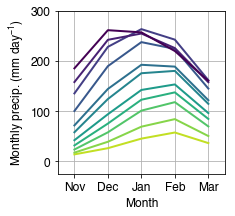

In [23]:
month_values = [1.5,2.5,3.5,4.5,5.5]
month_labels = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']

fontsize=12
fig = mp.figure(figsize=(3,3))
ax = fig.add_subplot(111)
for i in range(11):
    ax.plot(month_values, monthly_hist_rcp_cali_coast_enstimemean[i,:], color=matplotlib.cm.viridis_r((i+1)/11), lw=2)

ax.set_xticks(month_values)
ax.set_xticklabels(month_labels, ha='center', va='top')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Monthly precip. (mm day$^{-1}$)', fontsize=fontsize)
ax.set_xlabel('Month', fontsize=fontsize)

ax.set_xlim(1,6)
ax.set_ylim(-25,300)

ax.grid()

In [24]:
unique_lat_indices = numpy.unique(cali_coast_latlon_indices[:,0])

(5,) 5


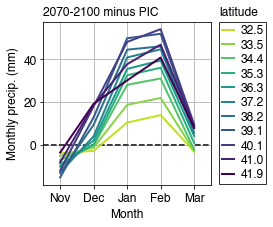

In [25]:
# month_values = numpy.array((1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5))
#month_labels = ['Nov','', 'Dec','', 'Jan','', 'Feb','', 'Mar']
month_values = numpy.array((1.,2.,3.,4.,5.))
month_half_values = numpy.hstack((0.5, month_values+0.5))
month_labels = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']

print(month_values.shape, len(month_labels))

fontsize=12
fig = mp.figure(figsize=(3,3))
ax = fig.add_subplot(111)
for i in range(11):
    ax.plot(month_values, monthly_hist_rcp_cali_coast_enstimemean[i,:]-monthly_pic_cali_coast_timemean[i,:], lw=2, color=matplotlib.cm.viridis_r((i+1)/11), label='{:.1f}'.format(PRECT_lat[unique_lat_indices][i]))

ax.axhline(y=0, lw=2, color='0.25', ls='--', zorder=1)

#x_interp = numpy.linspace(month_values.min(), month_values.max(), 1000)
#for i in range(11):
#    f_interp = scipy.interpolate.interp1d(month_values, monthly_hist_rcp_cali_coast_timemean[i,:]-monthly_pic_cali_coast_timemean[i,:],kind='cubic')
#    y_interp = f_interp(x_interp)
#    ax.plot(x_interp, y_interp, color=matplotlib.cm.viridis_r((i+1)/11))

ax.set_xticks(month_values)
ax.set_xticklabels(month_labels, ha='center', va='top')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Monthly precip. (mm)', fontsize=fontsize)
ax.set_xlabel('Month', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, \
          fontsize=fontsize, \
          #ncol=2, \
          bbox_to_anchor=(1.05,1.0), \
          edgecolor='0', \
          facecolor='None', \
          fancybox=False, \
          bbox_transform=ax.transAxes, \
          loc='upper left', \
          borderaxespad=0, \
          borderpad=0.25, \
          handlelength=1.0, \
          handletextpad=0.5, \
          #columnspacing=0.5, \
          markerscale=1, \
          labelspacing=0.2)

ax.text(s='latitude', x=1.05, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
ax.text(s='2070-2100 minus PIC', x=0, y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)

ax.set_xlim(0.5,5.5)
#ax.set_ylim(-25,275)

ax.grid()
ax.set_axisbelow(True)

fig.savefig('monthly_precip_changes_1920-2100_minus_PIC.pdf', bbox_inches='tight', transparent=True)

# Save the longitudinally averaged data

In [26]:
print(monthly_hist_rcp_cali_coast_enstimemean[:,:].shape)
print(monthly_pic_cali_coast_timemean[:,:].shape)

(11, 5)
(11, 5)


In [27]:
lat_vals= PRECT_lat[unique_lat_indices]

In [28]:
month_strings = ['November', 'December', 'January', 'February', 'March']
lat_strings = ['lat_'+'{:02d}'.format(i) for i in range(1,12)]

monthly_hist_rcp_cali_coast_df = pandas.DataFrame(numpy.column_stack((lat_vals, \
                                                  monthly_hist_rcp_cali_coast_enstimemean)), \
                                                  #index=range(1,lat_vals.size+1), \
                                                  columns=['lat_values']+month_strings)
monthly_pic_cali_coast_df = pandas.DataFrame(numpy.column_stack((lat_vals, \
                                                  monthly_pic_cali_coast_timemean)), \
                                                  #index=range(1,lat_vals.size+1), \
                                                  columns=['lat_values']+month_strings)

In [29]:
print(monthly_pic_cali_coast_df)

    lat_values    November    December     January    February       March
0    32.513089   17.434223   28.764447   34.625145   43.287598   39.149677
1    33.455497   22.232371   39.956738   50.135647   62.000726   52.949627
2    34.397906   30.328497   57.727356   72.792619   86.722587   71.508515
3    35.340314   40.407586   74.813870   90.051926  101.243302   83.282775
4    36.282723   51.959379   91.498510  106.576823  113.667225   91.762919
5    37.225131   70.521901  119.884239  134.576351  135.411828  108.720897
6    38.167539   84.443280  134.618042  147.767336  142.584973  113.603598
7    39.109948  115.197757  176.588632  187.599315  172.038637  136.608594
8    40.052356  147.070287  209.858035  215.212950  188.299627  151.866767
9    40.994764  165.836808  223.285123  216.821107  178.735881  148.489293
10   41.937173  188.620323  241.929943  226.708949  178.868565  152.309314


In [30]:
monthly_hist_rcp_cali_coast_df.to_csv('csv_files/NDJFM_hist_rcp_cali_coast_values_'+str(2070)+'-'+str(2100)+'.csv')
monthly_pic_cali_coast_df.to_csv('csv_files/NDJFM_pic_cali_coast_values.csv')